O desafio é uma simulação de um projeto de ciência de dados para a Indicium.  
A tarefa principal é atuar como cientista de dados para um estúdio de Hollywood chamado PProductions e fornecer orientações sobre o tipo de filme que deve ser desenvolvido a seguir.


O projeto se divide em **três partes principais**:


#### Análise Exploratória de Dados (EDA):
Uma análise detalhada para descobrir as principais características e relações entre as variáveis do conjunto de dados.


#### Insights e Recomendações: 
Responder a perguntas de negócio específicas, como recomendar um filme a uma pessoa desconhecida e identificar os fatores que levam a um alto faturamento.  
A análise da coluna *Overview* também é um ponto importante para gerar insights e inferir o gênero dos filmes.


#### Modelagem Preditiva:
O foco principal é prever a nota do IMDb dos filmes. Isso envolve a escolha de variáveis, a seleção de um modelo de regressão e a avaliação de seu desempenho. O desafio finaliza com a previsão da nota para um filme específico, "The Shawshank Redemption", e a exportação do modelo treinado no formato .pkl.

----

**O conjunto de dados** fornecido contém 15 colunas, incluindo:  
título do filme (Series_Title), ano de lançamento (Released_Year), duração (Runtime), gênero (Genre), nota do IMDb (IMDB_Rating), faturamento (Gross), entre outras.

## 1. Preparação dos Dados: Carregamento, Limpeza e Pré-Processamento

### 1.1 Importação das Bibliotecas

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

### 1.2 Carregamento dos Dados

In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


### 1.3 Limpeza e Pré-Processamento dos Dados

Vamos realizar a limpeza e transformação das colunas para deixá-las prontas para a análise e modelagem:

- Released_Year: Contém um valor object, que será preenchido pelo valor real e trasnformada para o tipo int. 

- Gross: contém caracteres indesejados, que serão removidos, e em seguida converteremos os valores para o tipo float.

- Runtime: possui a string "min", que será eliminada.

In [4]:
df['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [5]:
PG = df[df['Released_Year'] == 'PG']
PG

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [6]:
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = '1970'
df['Released_Year'] = df['Released_Year'].astype(int)

In [7]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Gross'].head(3)

0    134966411.0
1    534858444.0
2     57300000.0
Name: Gross, dtype: float64

In [8]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Runtime'].head(3)

0    175
1    152
2    202
Name: Runtime, dtype: int32

#### 1.3.1 Buscando informações faltantes


**Valores ausentes:** algumas colunas apresentam dados faltantes (Meta_score, Gross e Certificate), que serão tratados com enriquecimento de informações externas. 

A coluna (Certificate) possui diversas classificação, para que o modelo possa usar a coluna, vamos agrupar as classificações em três categorias principais: 'Universal', 'Orientação Parental' e 'Conteúdo Adulto'. Depois, aplicar o One-Hot Encoding para converter essas categorias em colunas numéricas binárias.

In [9]:
filmes_com_dados_ausentes = df[df['Meta_score'].isnull() | df['Gross'].isnull() | df['Certificate'].isnull()]

filmes_para_buscar = filmes_com_dados_ausentes[['Series_Title', 'Released_Year', 'Meta_score', 'Gross', 'Certificate']]
filmes_para_buscar.info()

filmes_para_buscar.to_csv('filmes_para_buscar.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 17 to 998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   286 non-null    object 
 1   Released_Year  286 non-null    int32  
 2   Meta_score     129 non-null    float64
 3   Gross          117 non-null    float64
 4   Certificate    185 non-null    object 
dtypes: float64(2), int32(1), object(2)
memory usage: 12.3+ KB


**Justificativa para a Estratégia de Enriquecimento de Dados**

Para garantir a qualidade e a integridade da nossa análise, consideramos fundamental complementar o dataset original com informações externas. Inicialmente, exploramos a biblioteca IMDbPY, mas enfrentamos inconsistências na extração de dados-chave.

Diante do alto valor financeiro envolvido na produção cinematográfica, optamos por uma abordagem mais robusta e confiável. A decisão estratégica é pivotar para a API do OMDb. Esta API deve fornecer os campos específicos que precisamos, como: Metascore, BoxOffice e Rated.

In [10]:
erro codigo 

SyntaxError: invalid syntax (1494381612.py, line 1)

**codigo 1**

def buscar_dados_omdb(titulo, ano=None):
    API_KEY = 'a4f0d92'
    BASE_URL = 'http://www.omdbapi.com/'
    try:
        params = {
            't': titulo,
            'apikey': API_KEY
        }
        if ano is not None and not pd.isna(ano):
            params['y'] = str(int(ano))

        response = requests.get(BASE_URL, params=params)
        
        if response.status_code != 200:
            print(f'Erro HTTP ao consultar {titulo}: {response.status_code}')
            return None

        data = response.json()
        if data.get('Response') == 'False':
            print(f'Filme não encontrado: {titulo} ({ano})')
            return None
        
        return data
    except Exception as e:
        print(f'Erro ao consultar OMDb para {titulo}: {e}')
        return None
    
df_filmes_para_buscar = pd.read_csv('filmes_para_buscar.csv')

df_atualizado = df_filmes_para_buscar.copy()

print(f"Iniciando a busca por dados ausentes de {len(df_atualizado)} filmes...")

atualizados = 0
nao_encontrados = 0

for index, row in df_atualizado.iterrows():
    titulo = row['Series_Title']
    ano = row['Released_Year']

    dados = buscar_dados_omdb(titulo, ano)

    if dados:
        foi_atualizado = False
        
        if pd.isna(row['Meta_score']) and dados.get('Metascore') and dados['Metascore'] != 'N/A':
            df_atualizado.loc[index, 'Meta_score'] = float(dados['Metascore'])
            foi_atualizado = True

        if pd.isna(row['Gross']) and dados.get('BoxOffice') and dados['BoxOffice'] != 'N/A':
            gross_str = dados['BoxOffice']
            gross_value = float(''.join(filter(str.isdigit, gross_str)))
            df_atualizado.loc[index, 'Gross'] = gross_value
            foi_atualizado = True

        if pd.isna(row['Certificate']) and dados.get('Rated') and dados['Rated'] != 'N/A':
            df_atualizado.loc[index, 'Certificate'] = dados['Rated']
            foi_atualizado = True

        if foi_atualizado:
            atualizados += 1
    else:
        nao_encontrados += 1

print(f'\nBusca e atualização concluída.')
print(f'Filmes atualizados: {atualizados}')
print(f'Filmes não encontrados: {nao_encontrados}')

df_atualizado.to_csv('filmes_busca_omdb_atualizado.csv', index=False)
print("\nO DataFrame com os dados preenchidos foi salvo em 'filmes_para_buscar_omdb_atualizado.csv'.")

In [11]:
API_KEY = 'a4f0d92'
BASE_URL = 'http://www.omdbapi.com/'

def buscar_dados_omdb(titulo, ano=None):
    try:
        params = {
            't': titulo,
            'apikey': API_KEY
        }
        if ano is not None and not pd.isna(ano):
            params['y'] = str(int(ano))

        response = requests.get(BASE_URL, params=params)
        
        if response.status_code != 200:
            print(f'Erro HTTP ao consultar {titulo}: {response.status_code}')
            return None

        data = response.json()
        if data.get('Response') == 'False':
            print(f'Filme não encontrado: {titulo} ({ano})')
            return None
        
        return data
    except Exception as e:
        print(f'Erro ao consultar OMDb para {titulo}: {e}')
        return None

In [12]:
df_atualizado = filmes_para_buscar.copy()

print(f'Iniciando a busca por dados ausentes de {len(df_atualizado)} filmes...')

atualizados = 0
nao_encontrados = 0

for index, row in df_atualizado.iterrows():
    titulo = row['Series_Title']
    ano = row['Released_Year']

    dados = buscar_dados_omdb(titulo, ano)

    if dados:
        atualizado = False
        
        if pd.isna(row['Meta_score']) and dados.get('Metascore') and dados['Metascore'] != 'N/A':
            df_atualizado.at[index, 'Meta_score'] = dados['Metascore']
            atualizado = True

        if pd.isna(row['Gross']) and dados.get('BoxOffice') and dados['BoxOffice'] != 'N/A':
            gross_str = dados['BoxOffice']
            gross_value = float(''.join(filter(str.isdigit, gross_str)))
            df_atualizado.at[index, 'Gross'] = gross_value
            atualizado = True

        if pd.isna(row['Certificate']) and dados.get('Rated') and dados['Rated'] != 'N/A':
            df_atualizado.at[index, 'Certificate'] = dados['Rated']
            atualizado = True

        if atualizado:
            atualizados += 1
    else:
        nao_encontrados += 1

print(f'Busca e atualização concluída.')
print(f'Filmes atualizados: {atualizados}')
print(f'Filmes não encontrados: {nao_encontrados}')

df_atualizado.to_csv('filmes_busca_omdb_atualizado.csv', index=False)
print("\nO DataFrame com os dados preenchidos foi salvo em 'filmes_para_buscar_omdb_atualizado.csv'.")

Iniciando a busca por dados ausentes de 286 filmes...
Filme não encontrado: Seppuku (1962)
Filme não encontrado: Hotaru no haka (1988)
Filme não encontrado: Taare Zameen Par (2007)


C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\1715001831.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_atualizado.at[index, 'Meta_score'] = dados['Metascore']


Filme não encontrado: Tengoku to jigoku (1963)
Filme não encontrado: Sunset Blvd. (1950)
Filme não encontrado: Babam ve Oglum (2005)
Filme não encontrado: Idi i smotri (1985)
Filme não encontrado: Ladri di biciclette (1948)
Filme não encontrado: M - Eine Stadt sucht einen Mörder (1931)
Filme não encontrado: Uri: The Surgical Strike (2018)
Filme não encontrado: Mandariinid (2013)
Filme não encontrado: Swades: We, the People (2004)
Filme não encontrado: Eskiya (1996)
Filme não encontrado: Dom za vesanje (1988)
Filme não encontrado: Höstsonaten (1978)
Filme não encontrado: Du rififi chez les hommes (1955)
Filme não encontrado: Tôkyô monogatari (1953)
Filme não encontrado: Koe no katachi (2016)
Filme não encontrado: Contratiempo (2016)
Filme não encontrado: Kis Uykusu (2014)
Filme não encontrado: Ôkami kodomo no Ame to Yuki (2012)
Filme não encontrado: Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni (1997)
Filme não encontrado: Ba wang bie ji (1993)
Filme não encontrado: Dà hóng

In [13]:
df_atualizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 17 to 998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   286 non-null    object 
 1   Released_Year  286 non-null    int32  
 2   Meta_score     149 non-null    object 
 3   Gross          143 non-null    float64
 4   Certificate    235 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 20.4+ KB


Com a execução da API do OMDb, conseguimos atualizar com sucesso os dados de 86 filmes. No entanto, 83 filmes não foram encontrados pela API. Para esses casos, a estratégia mais adequada para garantir que a base de dados permaneça completa é utilizar os métodos de imputação: preencheremos os dados ausentes de Meta_score com a média da coluna, Gross com a mediana e Certificate com a moda, permitindo que todos os filmes sejam considerados no nosso modelo preditivo.

In [26]:
df.update(df_atualizado)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    911 non-null    object 
 4   Runtime        999 non-null    int32  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     882 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          851 non-null    float64
dtypes: float64(3), int32(1), int64(3), object(9)
memory usage: 121.1+ KB


In [27]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

**Tratamento da Coluna Certificate (Classificação Etária)**

A coluna Certificate apresenta um conjunto diversificado de classificações etárias de diferentes sistemas, o que inviabiliza sua utilização direta em modelos preditivos.  
Para resolver essa inconsistência, será implementada uma estratégia de padronização, onde as classificações originais serão agrupadas em três categorias principais: Universal, Orientacao Parental e Conteúdo Adulto. Na sequência, a coluna agrupada será convertida para um formato numérico por meio da técnica de One-Hot Encoding. Este processo criará colunas binárias para cada nova categoria, garantindo que o modelo não interprete uma ordem hierárquica inexistente entre as classificações, o que resultará em uma representação precisa dos dados para a fase de modelagem.

In [28]:
df['Certificate'].unique()

array(['PG-13', 'U', 'A', 'PG', 'UA', 'Passed', 'TV-14', 'Not Rated', 'R',
       '16', 'TV-MA', 'G', 'Unrated', 'GP', 'Approved', 'TV-PG', 'NC-17',
       'U/A'], dtype=object)

In [29]:
unrated = df[df['Certificate'] == 'Unrated']
unrated

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
79,80,Dil Chahta Hai,2001,Unrated,88,"Drama, War",8.4,"After refusing to attack an enemy position, a ...",90.0,Stanley Kubrick,Kirk Douglas,Ralph Meeker,Adolphe Menjou,George Macready,178092,300000.0


In [30]:
df.loc[df['Series_Title'] == 'Dil Chahta Hai', 'Certificate'] = 'U'

In [31]:
categorias = {
    'G': 'Universal',
    'U': 'Universal',
    'Passed': 'Universal',
    'Approved': 'Universal',
    'PG': 'Orientacao Parental',
    'PG-13': 'Orientacao Parental',
    'U/A': 'Orientacao Parental',
    'UA': 'Orientacao Parental',
    'A': 'Conteudo Adulto',
    'R': 'Conteudo Adulto',
    '16': 'Conteudo Adulto',
    'TV-14': 'Conteudo Adulto',
    'TV-MA': 'Conteudo Adulto',
    'GP': 'Orientacao Parental',
    'TV-PG': 'Orientacao Parental'
}

df['Certificate_Grouped'] = df['Certificate'].map(categorias)

df = pd.get_dummies(df, columns=['Certificate_Grouped'], prefix='Certificate')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       999 non-null    int64  
 1   Series_Title                     999 non-null    object 
 2   Released_Year                    999 non-null    int64  
 3   Certificate                      999 non-null    object 
 4   Runtime                          999 non-null    int32  
 5   Genre                            999 non-null    object 
 6   IMDB_Rating                      999 non-null    float64
 7   Overview                         999 non-null    object 
 8   Meta_score                       999 non-null    float64
 9   Director                         999 non-null    object 
 10  Star1                            999 non-null    object 
 11  Star2                            999 non-null    object 
 12  Star3                 

In [64]:
df.to_csv('desafio_indicium_imdb_completo.csv', index=False)

## 2. Análise Exploratória de Dados (EDA)

Com a base de dados agora completa e enriquecida, a próxima etapa é a Análise Exploratória de Dados (EDA). O objetivo desta seção é examinar e visualizar as principais características do nosso dataset, identificar padrões, detectar anomalias e testar as hipóteses iniciais.

O código a seguir irá focar nas seguintes análises:

Distribuição das Variáveis: Será plotado um histograma para entender a distribuição da nota do IMDb, distribuição das notas em relação as categorias e a distribuição do faturamento dos filmes.

Correlação entre Variáveis Numéricas: Iremos criar uma matriz de correlação para identificar a força e a direção das relações entre IMDB_Rating, Meta_score, Gross e o No_of_Votes.

Relação entre Gênero e Nota: Serão utilizados box plots para visualizar como a nota do IMDb varia entre os diferentes gêneros de filmes, ajudando a entender quais gêneros tendem a ter uma avaliação mais alta.

Relação dos Diretores e Atores entra Nota: Será feito o top 10 Diretores e top 15 Atores mais frequentes e com as melhores notas, ajudando a identificar quais Diretores e Atores tendem a ser sucesso. 

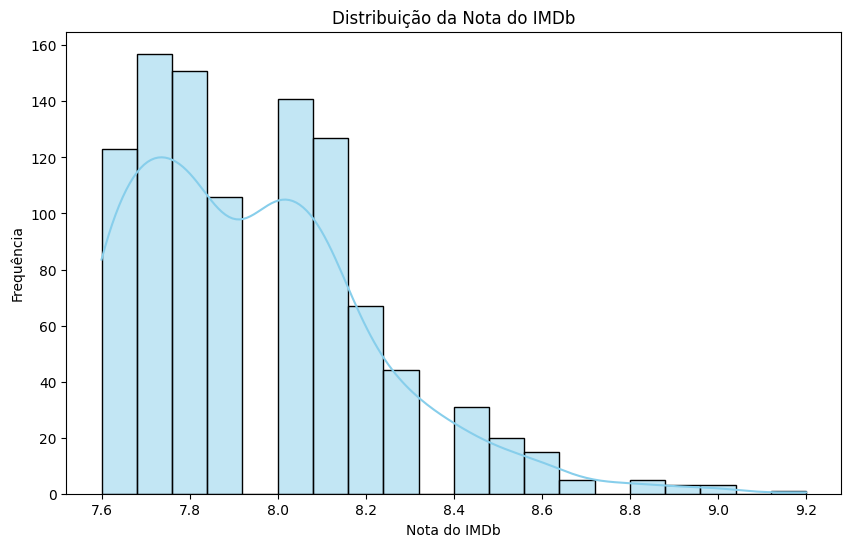

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Nota do IMDb')
plt.xlabel('Nota do IMDb')
plt.ylabel('Frequência')
plt.show()

Ao analisar a distribuição das notas do IMDb, percebemos que os filmes da base já são bem avaliados, todos acima de 7.6. A maior parte está concentrada entre 7.6 e 8.1, enquanto poucos conseguem passar de 8.7. Isso mostra que alcançar notas muito altas é algo raro. Para o modelo, pode ser fácil identificar padrões dos filmes que ficam na média, mas o desafio será entender o que faz alguns se destacarem tanto. Pode ser que fatores como gênero, direção e elenco sejam decisivos para explicar essa diferença.

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\2675383967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=certificate_ratings, x='Nota Média IMDb', y='Categoria', palette='plasma')


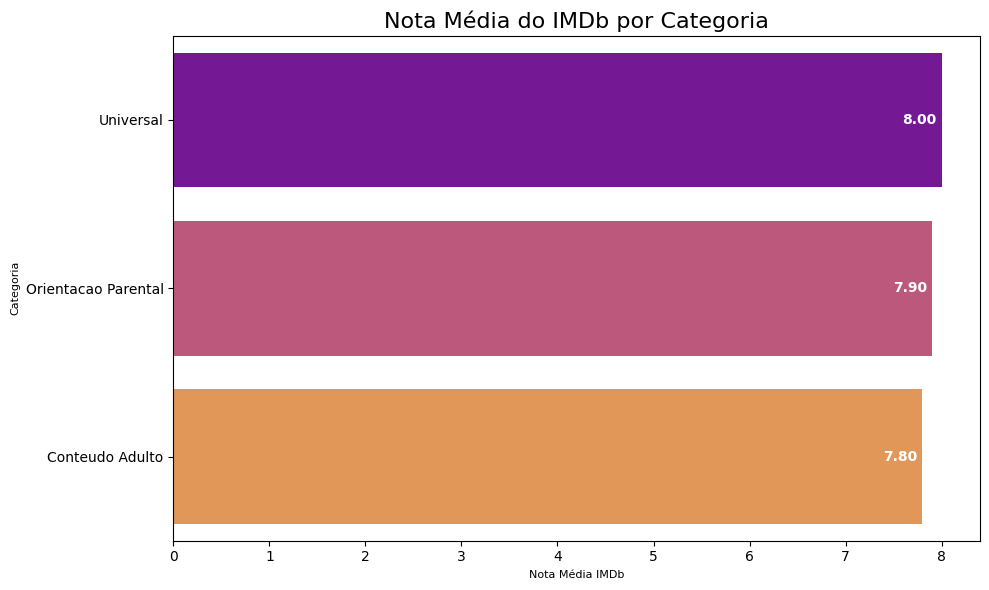

In [44]:
df['Certificate_Grouped'] = df['Certificate'].map(categorias)

certificate_ratings = df.groupby('Certificate_Grouped')['IMDB_Rating'].median().sort_values(ascending=False).reset_index()

certificate_ratings.columns = ['Categoria', 'Nota Média IMDb']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=certificate_ratings, x='Nota Média IMDb', y='Categoria', palette='plasma')

for index, row in certificate_ratings.iterrows():
    barplot.text(row['Nota Média IMDb'] - 0.05, index, f"{row['Nota Média IMDb']:.2f}", color='white', ha="right", va="center", weight='bold')

plt.title('Nota Média do IMDb por Categoria', fontsize=16)
plt.xlabel('Nota Média IMDb', fontsize=8)
plt.ylabel('Categoria', fontsize=8)

plt.tight_layout()
plt.show() 

A análise revela uma distribuição de notas médias bastante concentrada entre as categorias, o que reforça a observação inicial de que a maioria dos filmes no dataset possui uma avaliação alta (entre 7.6 e 8.1). Especificamente, a categoria 'Universal' apresenta a maior nota média, com 8, seguida de perto por 'Orientação Parental' com 7.9 e 'Conteúdo Adulto' com 7.8.

O ponto mais notável é a pequena variabilidade entre os grupos; a diferença entre a maior e a menor nota média é de apenas 0.2 pontos. Isso sugere que, embora exista uma leve hierarquia, a categoria de certificado, por si só, não parece ser um fator de grande impacto ou um forte diferenciador na nota final do filme neste conjunto de dados.

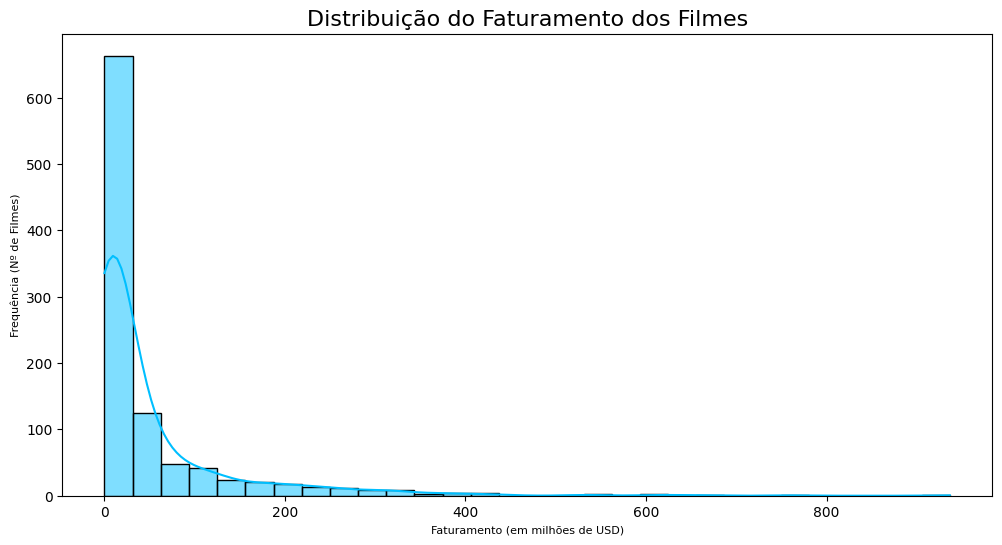

In [48]:
df['Gross_milhao'] = df['Gross'] / 1_000_000

plt.figure(figsize=(12, 6))
sns.histplot(df['Gross_milhao'], bins=30, kde=True, color='deepskyblue')
plt.title('Distribuição do Faturamento dos Filmes', fontsize=16)
plt.xlabel('Faturamento (em milhões de USD)', fontsize=8)
plt.ylabel('Frequência (Nº de Filmes)', fontsize=8)
plt.show()


histograma do faturamento revela um insight interessante: o sucesso de bilheteria na indústria de filmes de alta qualidade não é a norma, mas uma grande exceção. A esmagadora concentração de filmes na extremidade esquerda do gráfico mostra que a maioria das produções aclamadas gera uma receita "modesta". A "cauda longa" que se estende para a direita é formada por um número muito pequeno de filmes que alcançaram um faturamento extraordinariamente alto, os verdadeiros blockbusters.

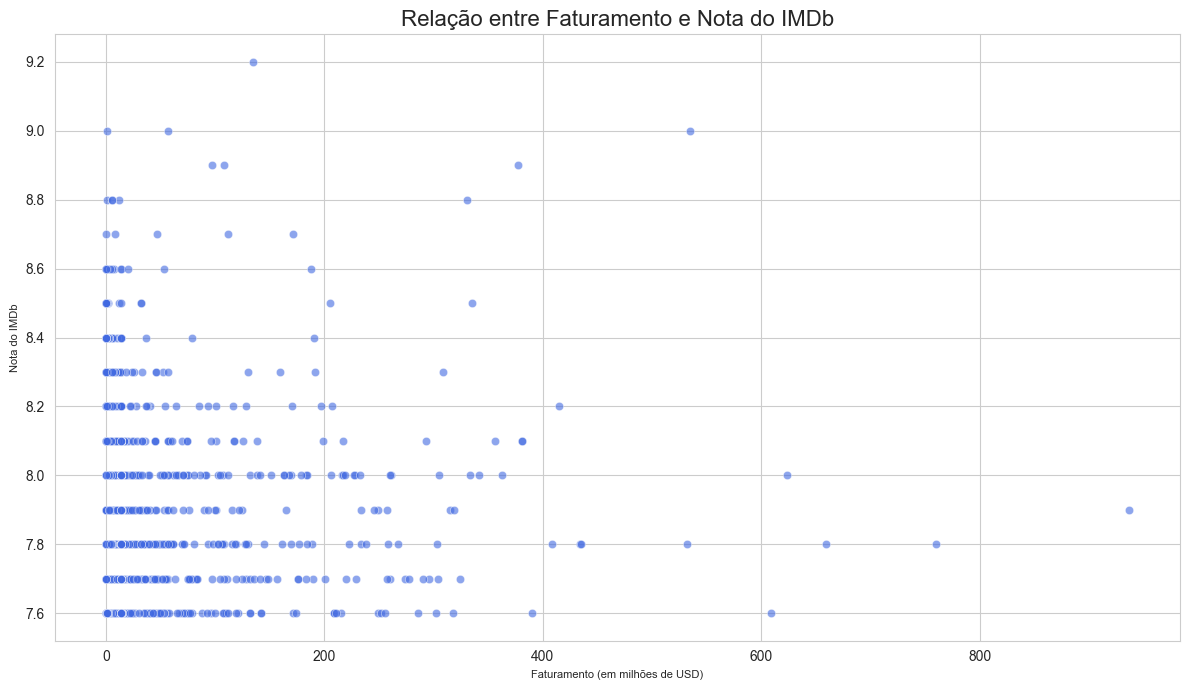

In [54]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Gross_milhao', y='IMDB_Rating', alpha=0.6, color='royalblue')
plt.title('Relação entre Faturamento e Nota do IMDb', fontsize=16)
plt.xlabel('Faturamento (em milhões de USD)', fontsize=8)
plt.ylabel('Nota do IMDb', fontsize=8)
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

O gráfico de dispersão mostra que não existe uma relação forte e direta entre o faturamento de um filme e sua nota no IMDb. Podemos identificar filmes com notas excepcionais (acima de 8.5) existem em todas as faixas de faturamento, desde as mais baixas até as mais altas. Da mesma forma, os filmes de maior bilheteria não estão concentrados apenas no topo das notas, mas se distribuem em uma faixa de avaliações. Isso indica que um alto orçamento ou sucesso de bilheteria não é pré-requisito nem garantia para uma avaliação máxima do público.

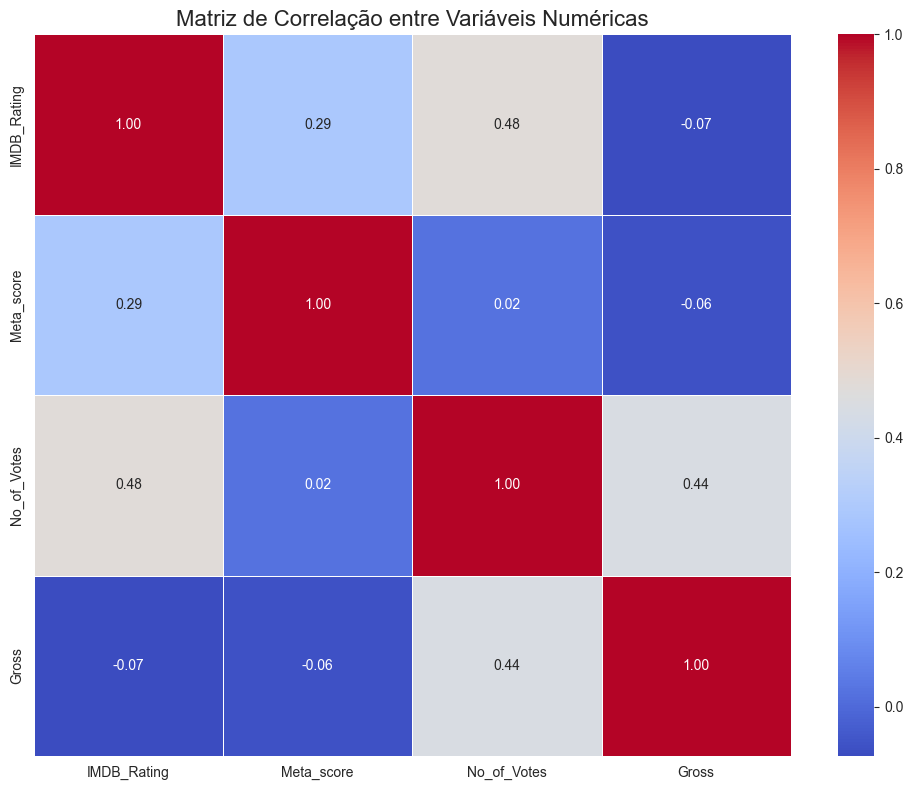

In [59]:
col_numerica = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', '']
correlacao = df[col_numerica].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

A análise de correlação entre as variáveis numéricas não trouxe grandes insights. A relação mais relevante foi entre a nota e o número de votos (0,48). Esse resultado reforça a importância de aplicar engenharia de features para enriquecer as informações disponíveis, permitindo que o modelo aprenda melhor e realize predições mais precisas.

**Gênero**

Como nosso principal objetivo é identificar o gênero com maior potencial de sucesso para o próximo lançamento da PProduction, vamos aprofundar a análise das informações disponíveis.

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\645478060.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_genero, x='IMDB_Rating', y='Genre', order=ordem, palette='viridis')


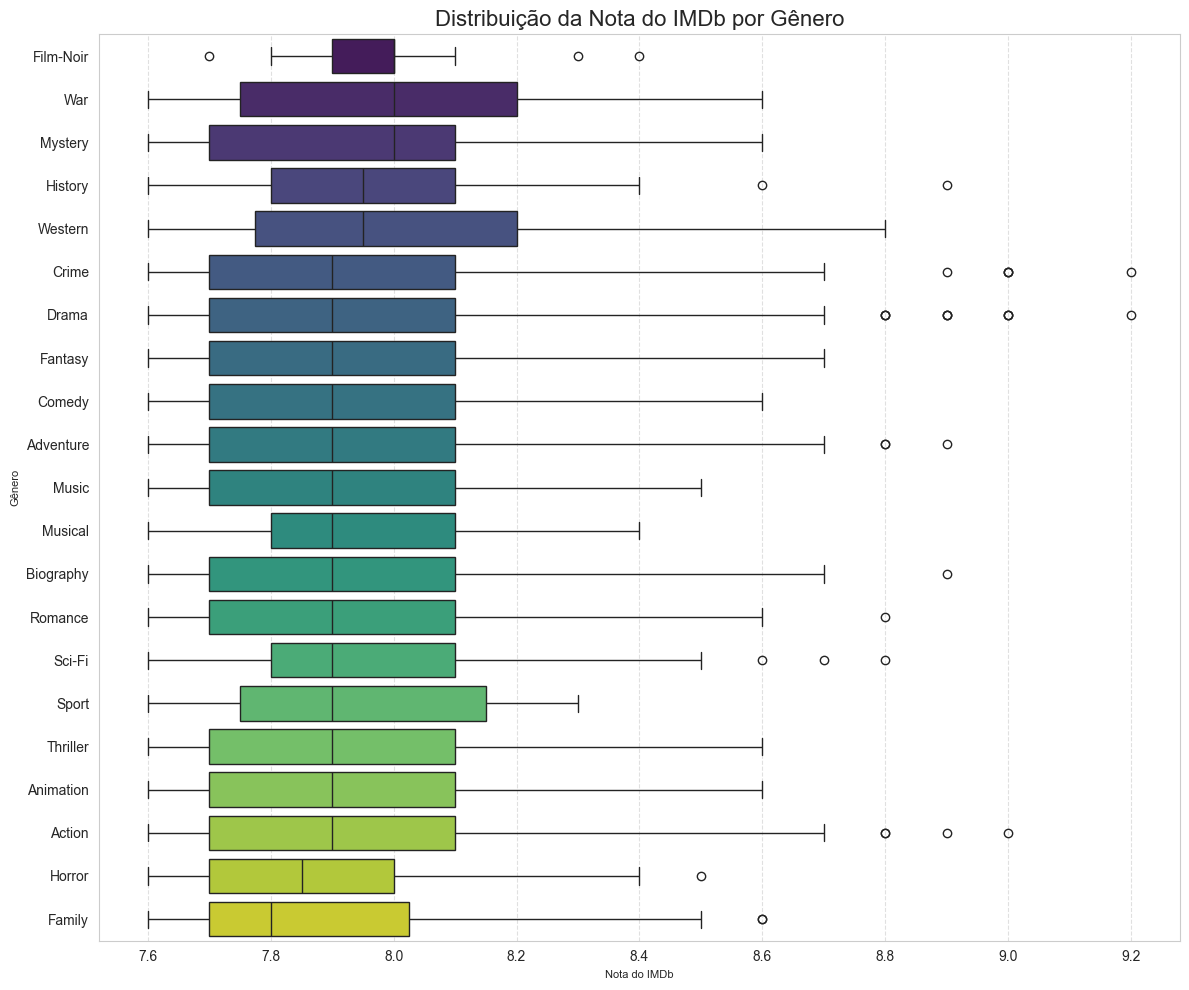

In [61]:
df_genero = df.copy()

df_genero['Genre'] = df_genero['Genre'].str.split(', ')
df_genero = df_genero.explode('Genre')

ordem = df_genero.groupby('Genre')['IMDB_Rating'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 10))
sns.boxplot(data=df_genero, x='IMDB_Rating', y='Genre', order=ordem, palette='viridis')

plt.title('Distribuição da Nota do IMDb por Gênero', fontsize=16)
plt.xlabel('Nota do IMDb', fontsize=8)
plt.ylabel('Gênero', fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Ao analisar o box plot dos generos, o primeiro insight foi que os primeiros generos de filmes traze muma media maior de pontuação, mas nõ queremos estar na máeida, queremos algo expecional. Então o segundo insght foi: drama e crime apresentam um bigode maior e ais outliers a direia, sendo tb os únicos com pontuação de 9.2

Vamos aprofundar esta análise e validar esses dois pontos:
- Filmes com nota 9.2 (ou maior):
- Outliers à direita para Drama e Crime.

In [62]:
top_nota = df[df['IMDB_Rating'] >= 9]
top_genero = top_nota['Genre'].str.split(', ').explode().unique()

print("--- Filmes com Nota IMDb >= 9 ---")
for index, row in top_nota.iterrows():
    print(f"Nota: {row['IMDB_Rating']}, Título: {row['Series_Title']}, Gêneros: {row['Genre']}")
print(f"\nGêneros únicos presentes nos filmes com nota >= 9: {list(top_genero)}")
print("-" * 30)


--- Filmes com Nota IMDb >= 9 ---
Nota: 9.2, Título: Hamilton, Gêneros: Crime, Drama
Nota: 9.0, Título: Soorarai Pottru, Gêneros: Action, Crime, Drama
Nota: 9.0, Título: Seppuku, Gêneros: Crime, Drama
Nota: 9.0, Título: It's a Wonderful Life, Gêneros: Crime, Drama

Gêneros únicos presentes nos filmes com nota >= 9: ['Crime', 'Drama', 'Action']
------------------------------


O resultado da análise é conclusivo: todos os quatro filmes que atingiram ou superaram a nota 9.0 no IMDb compartilham uma base temática de Crime e Drama.

Padrão Dominante: Três dos quatro filmes (Hamilton, Seppuku e It's a Wonderful Life) são categorizados puramente como "Crime, Drama". Isso estabelece um padrão muito forte.

Variação de Sucesso: O filme Soorarai Pottru adiciona o gênero "Action" à mistura de "Crime, Drama". Isso sugere que a fórmula central é robusta o suficiente para ser combinada com outros gêneros de grande apelo, como Ação, sem perder seu potencial de aclamação.

In [63]:
def busca_outliers(genero):
    classificacao_genero = df_genero[df_genero['Genre'] == genero]['IMDB_Rating']
    Q1 = classificacao_genero.quantile(0.25)
    Q3 = classificacao_genero.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    outlier_movies = df[df['Genre'].str.contains(genero) & (df['IMDB_Rating'] > upper_bound)]
    
    print(f"\n--- Outliers para o Gênero: {genero} (Nota > {upper_bound:.2f}) ---")
    if outlier_movies.empty:
        print("Nenhum outlier encontrado.")
    else:
        for index, row in outlier_movies.iterrows():
            print(f"Nota: {row['IMDB_Rating']}, Título: {row['Series_Title']}")

busca_outliers('Drama')
busca_outliers('Crime')


--- Outliers para o Gênero: Drama (Nota > 8.70) ---
Nota: 9.2, Título: Hamilton
Nota: 9.0, Título: Soorarai Pottru
Nota: 9.0, Título: Seppuku
Nota: 9.0, Título: It's a Wonderful Life
Nota: 8.9, Título: Hotaru no haka
Nota: 8.9, Título: Ayla: The Daughter of War
Nota: 8.9, Título: Vikram Vedha
Nota: 8.8, Título: Taare Zameen Par
Nota: 8.8, Título: Once Upon a Time in America
Nota: 8.8, Título: Anand

--- Outliers para o Gênero: Crime (Nota > 8.70) ---
Nota: 9.2, Título: Hamilton
Nota: 9.0, Título: Soorarai Pottru
Nota: 9.0, Título: Seppuku
Nota: 9.0, Título: It's a Wonderful Life
Nota: 8.9, Título: Ayla: The Daughter of War


A análise dos outliers revela um insight fundamental: para um filme do gênero Crime atingir um patamar de excelência (tornando-se um outlier), ele precisa ser, em sua essência, um Drama poderoso.

A evidência mais forte para isso é que todos os outliers identificados para o gênero 'Crime' também são outliers para o gênero 'Drama'. Não há um único filme de 'Crime' nesta lista de elite que não tenha um componente dramático igualmente excepcional.

Isso sugere que, embora a trama de crime forneça a estrutura, a tensão e as altas apostas, é a profundidade do desenvolvimento dos personagens, os conflitos emocionais e as complexidades morais (elementos centrais do gênero 'Drama') que verdadeiramente elevam o filme a um status de obra-prima.

### **Recomendação Estratégica**:
Para o estúdio, a recomendação não seria simplesmente produzir um "filme de crime", mas sim um "drama humano ambientado no universo do crime". A fórmula de maior sucesso para alcançar notas extraordinárias e se destacar como um filme memorável é focar na jornada emocional e nos dilemas dos personagens, utilizando o enredo de crime como o catalisador que testa e revela suas verdadeiras naturezas.

Assim como fizemos com Gênero, vamos analisar o peso dos diretores e atores para as notas do IMDb, para isso vamos:

- Identificar os diretores e atores mais Frequentes
- Calcular aperformace média
- Visualizar o top 10 diretores e top 15 atores

Essa identificação nos ajudará a montar um elenco com maior chance em atingir nota excepcional. 

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\3161057341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  director_plot = sns.barplot(x=media_diretor.values, y=media_diretor.index, palette='mako')


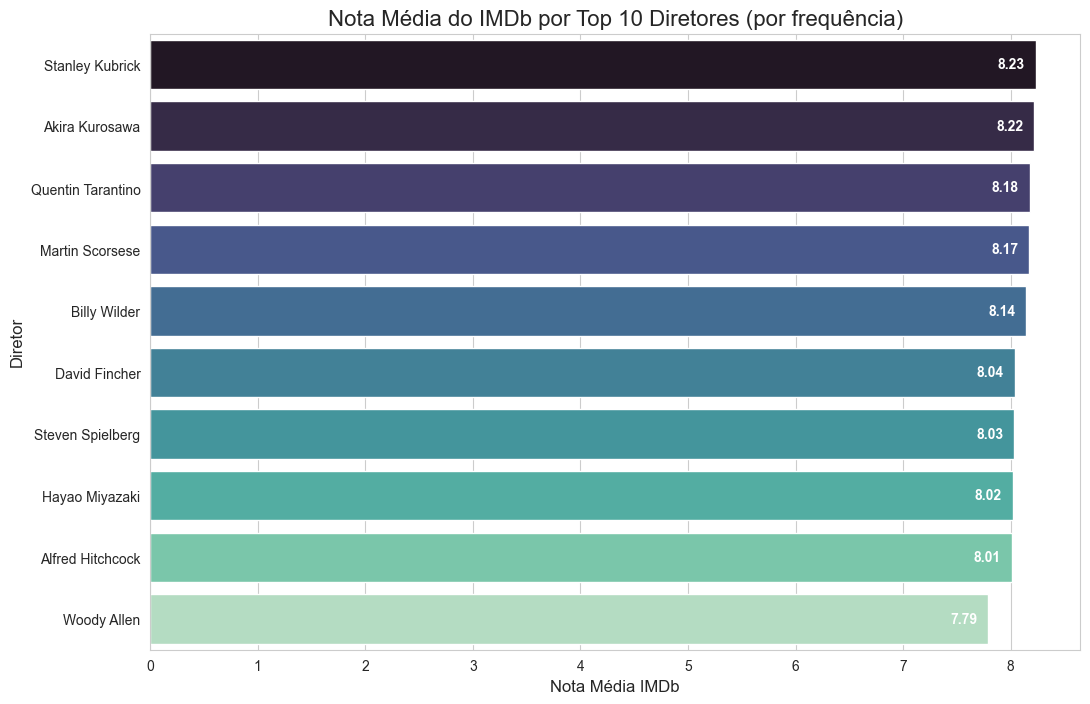

In [70]:
top_10_diretores = df['Director'].value_counts().nlargest(10).index
df_top_diretores = df[df['Director'].isin(top_10_diretores)]
media_diretor = df_top_diretores.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
diretor_plot = sns.barplot(x=media_diretor.values, y=media_diretor.index, palette='mako')
diretor_plot.set_title('Nota Média do IMDb por Top 10 Diretores (por frequência)', fontsize=16)
diretor_plot.set_xlabel('Nota Média IMDb', fontsize=12)
diretor_plot.set_ylabel('Diretor', fontsize=12)
for index, value in enumerate(media_diretor.values):
    diretor_plot.text(value - 0.1, index, f'{value:.2f}', color='white', ha="right", va="center", weight='bold')
plt.show()

Entre os diretores que mais aparecem na lista de filmes aclamados, Stanley Kubrick, Akira Kurosawa, Quentin Tarantino e Martin Scorsese se destacam com as maiores notas médias. Isso indica que eles não apenas dirigiram muitos filmes de alta qualidade, mas que seu trabalho é consistentemente avaliado no topo.

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\883750602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ator_plot = sns.barplot(x=actor_mean_rating.values, y=actor_mean_rating.index, palette='rocket')


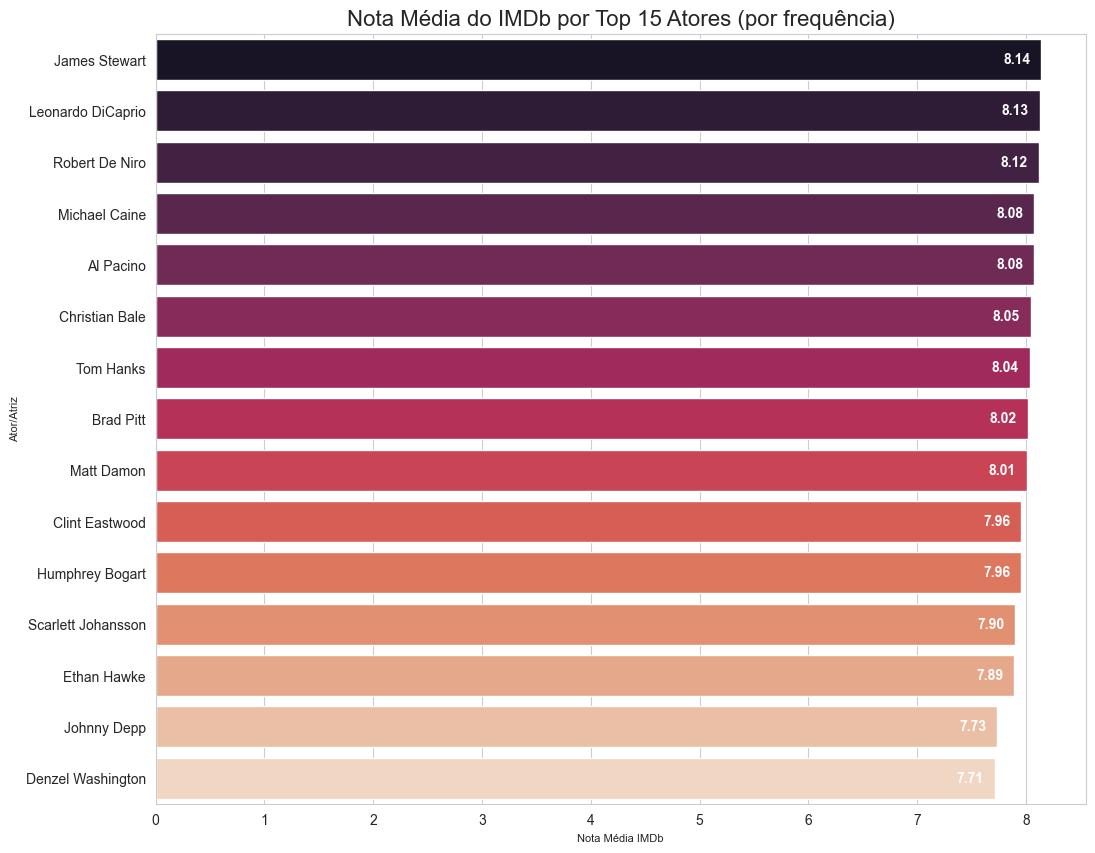

In [71]:
colunas_atores = ['Star1', 'Star2', 'Star3', 'Star4']
atores = df[colunas_atores].melt(value_name='Actor')['Actor']
top_15_atores = atores.value_counts().nlargest(15).index
df_rank_atores = df.melt(id_vars='IMDB_Rating', value_vars=colunas_atores, value_name='Actor')
df_top_actors = df_rank_atores[df_rank_atores['Actor'].isin(top_15_atores)]
actor_mean_rating = df_top_actors.groupby('Actor')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
ator_plot = sns.barplot(x=actor_mean_rating.values, y=actor_mean_rating.index, palette='rocket')
ator_plot.set_title('Nota Média do IMDb por Top 15 Atores (por frequência)', fontsize=16)
ator_plot.set_xlabel('Nota Média IMDb', fontsize=8)
ator_plot.set_ylabel('Ator/Atriz', fontsize=8)
for index, value in enumerate(actor_mean_rating.values):
    ator_plot.text(value - 0.1, index, f'{value:.2f}', color='white', ha="right", va="center", weight='bold')
plt.show()

Na análise dos atores, James Stewart e LEonardo DiCaprio lideram entre os mais frequentes, com as maiores notas médias. Isso sugere que a presença deles em um filme está fortemente associada a uma avaliação de elite. Atores como Robert De Niro, Michael Caine e Al Pacino também mostram uma performance média altíssima, solidificando seus status como sinônimos de qualidade.

## 3. Engenharia de Features

Nesta etapa, vamos transformar e criar novas variáveis a partir dos dados originais para potencializar o desempenho dos modelos preditivos. O objetivo da engenharia de features é extrair o máximo de informação relevante do dataset, tornando os dados mais representativos e informativos para o algoritmo.

O processo inclui:
- **Criação de variáveis dummies para gêneros**: transformar a coluna de gêneros em variáveis binárias, permitindo que o modelo reconheça a presença de cada gênero em um filme.
- **Identificação de diretores e atores de elite**: criar variáveis que indicam se um filme possui diretor ou ator entre os mais frequentes e bem avaliados, capturando o efeito do "star power".
- **Feature de reputação do diretor**: adicionar uma variável que representa a média histórica das notas dos filmes de cada diretor, trazendo contexto sobre sua reputação.

Essas transformações são fundamentais para enriquecer o conjunto de dados e permitir que o modelo aprenda padrões mais complexos e relevantes, aumentando a precisão das previsões.

In [122]:
genro_dummies = df['Genre'].str.get_dummies(sep=', ')
genro_dummies = genro_dummies.add_prefix('Genre_')
df_model = pd.concat([df, genro_dummies], axis=1)
df_model = df_model.drop(columns=['Genre'])

In [123]:
top_10_diretores = df_model['Director'].value_counts().nlargest(10).index
df_model['diretor_top_10'] = df_model['Director'].isin(top_10_diretores).astype(int)

In [124]:
colunas_atores = ['Star1', 'Star2', 'Star3', 'Star4']
atores = df_model[colunas_atores].melt(value_name='Ator')['Ator']
top_15_atores = atores.value_counts().nlargest(15).index
verificacao_atores = df_model[colunas_atores].isin(top_15_atores)
df_model['ator_top_15'] = verificacao_atores.any(axis=1).astype(int)

In [125]:
mapa_media_diretor = df_model.groupby('Director')['IMDB_Rating'].mean()
df_model['diretor_media_nota'] = df_model['Director'].map(mapa_media_diretor)
df_model['diretor_media_nota'].fillna(df_model['IMDB_Rating'].mean(), inplace=True)

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\3043347362.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['diretor_media_nota'].fillna(df_model['IMDB_Rating'].mean(), inplace=True)


In [126]:
df_model.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Certificate_Conteudo Adulto',
       'Certificate_Orientacao Parental', 'Certificate_Universal',
       'Certificate_Grouped', 'Gross_milhao', 'Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Biography', 'Genre_Comedy',
       'Genre_Crime', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy',
       'Genre_Film-Noir', 'Genre_History', 'Genre_Horror', 'Genre_Music',
       'Genre_Musical', 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi',
       'Genre_Sport', 'Genre_Thriller', 'Genre_War', 'Genre_Western',
       'diretor_top_10', 'ator_top_15', 'diretor_media_nota'],
      dtype='object')

In [127]:
colunas_para_remover = [
    'Unnamed: 0',
    'Series_Title',
    'Certificate',
    'Overview',
    'Director',
    'Star1',
    'Star2',
    'Star3',
    'Star4',
    'Certificate_Grouped',
    'Gross_milhao',
]

df_modelo_final = df_model.drop(columns=colunas_para_remover)

## 4. Modelagem

In [92]:
X = df_modelo_final.drop('IMDB_Rating', axis=1)
y = df_modelo_final['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.1 Random Forest Regressor

In [93]:
Random_Forest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

Random_Forest.fit(X_train, y_train)
previsoes_RF = Random_Forest.predict(X_test)
rmse_RF = np.sqrt(mean_squared_error(y_test, previsoes_RF))
r2_RF = r2_score(y_test, previsoes_RF)

print("\n--- Resultados Random Forest Regressor ---")
print(f"RMSE (Root Mean Squared Error): {rmse_RF:.4f}")
print(f"R² (R-quadrado): {r2_RF:.4f}")


--- Resultados Random Forest Regressor ---
RMSE (Root Mean Squared Error): 0.1444
R² (R-quadrado): 0.6823


A primeira versão do modelo preditivo para a nota do IMDb demonstrou um desempenho inicial muito forte e promissor. Com um Erro Médio Quadrático (RMSE) de apenas 0.1444, o modelo se mostrou bastante preciso, indicando que suas previsões, em média, desviam apenas 0.14 pontos da nota real. Adicionalmente, o coeficiente de determinação (R²) de 0.6823 revela que as features selecionadas e construídas durante a análise conseguem explicar 68.23% da variação nas notas dos filmes. Em conjunto, esses resultados validam a relevância das características analisadas, como: gênero, diretor e faturamento, estabelecem uma base sólida, confirmando que o modelo é eficaz e possui um bom poder preditivo.

### 4.2 LightGBM (LGB)

In [95]:
modelo_lgb = lgb.LGBMRegressor(random_state=42)
modelo_lgb.fit(X_train, y_train)

previsoes_lgb = modelo_lgb.predict(X_test)
rmse_lgb = np.sqrt(mean_squared_error(y_test, previsoes_lgb))
r2_lgb = r2_score(y_test, previsoes_lgb)

print("\n--- Resultados LightGBM ---")
print(f"RMSE (Root Mean Squared Error): {rmse_lgb:.4f}")
print(f"R² (R-quadrado): {r2_lgb:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 28
[LightGBM] [Info] Start training from score 7.951439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

A análise do modelo LightGBM, com seus parâmetros padrão, indica um desempenho robusto e de alta qualidade. O modelo alcançou um Erro Médio Quadrático (RMSE) de 0.1457, o que demonstra uma excelente precisão, significando que suas previsões da nota IMDb erram, em média, por uma margem muito pequena. Adicionalmente, o coeficiente de determinação (R²) foi de 0.6766, indicando que o conjunto de features utilizado é capaz de explicar 67.66% da variação nas notas dos filmes. Este resultado confirma que o modelo LightGBM também foi muito eficaz em aprender os padrões dos dados e se estabelece como uma alternativa forte e viável para a previsão de notas.

### 4.3 Compração entre os modelos:

Com base nesta comparação, o nosso primeiro modelo, o Random Forest, apresentou um desempenho ligeiramente superior ao do LightGBM com os parâmetros padrão. O Random Forest teve um erro médio um pouco menor (melhor precisão) e conseguiu explicar uma porcentagem um pouco maior da variação das notas (maior poder preditivo).

É importante notar que a diferença entre eles é muito pequena, o que significa que ambos os modelos são excelentes e estão capturando os padrões nos dados de forma muito eficaz. Para este problema específico e com a configuração atual, o Random Forest leva uma pequena vantagem.

### 4.4 Melhorando o Modelo

#### 4.4.1 Análise de Features Importância

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\4078740059.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Feature', data=top_15_features, palette='viridis')


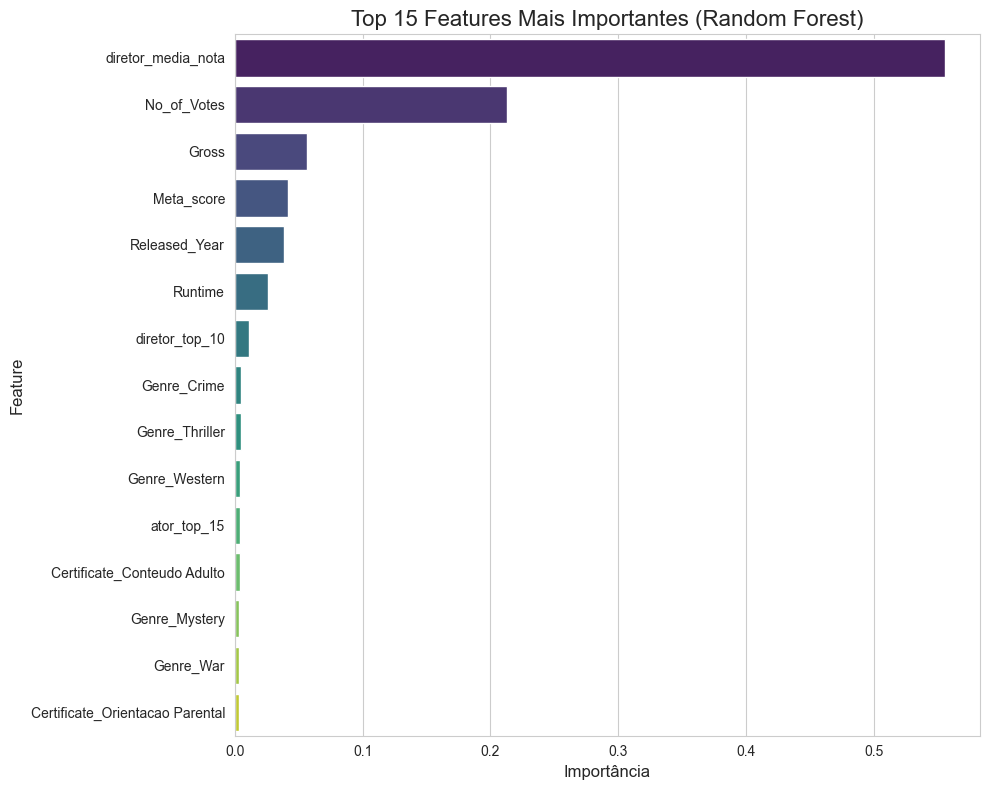

In [96]:
modelo_base = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
modelo_base.fit(X_train, y_train)

importancias = pd.DataFrame({
    'Feature': X_train.columns,
    'Importancia': modelo_base.feature_importances_
}).sort_values(by='Importancia', ascending=False)

top_15_features = importancias.head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Feature', data=top_15_features, palette='viridis')
plt.title('Top 15 Features Mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()


a característica de maior importância para o modelo foi a diretor_media_nota. Isso significa que a reputação histórica de um diretor, traduzida em sua nota média, é o melhor indicador isolado para prever a qualidade de um novo filme. Logo em seguida vem o No_of_Votes (o volume de engajamento do público), que se mostraram mais influentes que o próprio faturamento (Gross).

Além disso, as features que criamos para capturar o "star power", diretor_top_10 e ator_top_15, também figuram entre as mais importantes, provando que ter um talento de elite envolvido tem um peso preditivo real.

#### 4.4.2 Otimização de Hiperparâmetros

In [98]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3, 
    scoring='neg_mean_squared_error',
    verbose=1)

grid_search.fit(X_train, y_train)
melhor_modelo = grid_search.best_estimator_
previsoes_otimizadas = melhor_modelo.predict(X_test)
rmse_otimizado = np.sqrt(mean_squared_error(y_test, previsoes_otimizadas))
r2_otimizado = r2_score(y_test, previsoes_otimizadas)

print(f"Melhores Parâmetros Encontrados: {grid_search.best_params_}")
print("\n--- Resultados do Modelo Otimizado ---")
print(f"Novo RMSE: {rmse_otimizado:.4f}")
print(f"Novo R²: {r2_otimizado:.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores Parâmetros Encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--- Resultados do Modelo Otimizado ---
Novo RMSE: 0.1438
Novo R²: 0.6850


A busca pelos melhores parâmetros (GridSearchCV) foi bem-sucedida. O processo descobriu que um modelo com o dobro de árvores (n_estimators: 200) e uma profundidade de até 20 níveis (max_depth: 20) consegue um desempenho ligeiramente superior ao modelo com as configurações padrão.

A melhora é sutil, mas é importante. O erro médio (RMSE) foi reduzido, o que significa que o modelo otimizado é um pouco mais preciso. E o poder explicativo (R²) aumentou, indicando que o novo modelo consegue explicar uma porção um pouco maior da variação das notas.

### 4.5 Salvando o Modelo Campeão

In [121]:
nome_arquivo = 'modelo_imdb.pkl'
with open(nome_arquivo, 'wb') as file:
    pickle.dump(melhor_modelo, file)

## 5 Previsão para 'The Shawshank Redemption'

Prevendo a nota do IMDb de um novo filme com as caracteristicas a seguir:

In [114]:
novo_filme_dados = { 'Series_Title': 'The Shawshank Redemption',  
 'Released_Year': '1994',  
 'Certificate': 'A',
 'Certificate_Grouped': 'Conteudo Adulto',  
 'Runtime': '142',  
 'Genre': 'Drama',  
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',  
 'Meta_score': 80.0,  
 'Director': 'Frank Darabont',  
 'Star1': 'Tim Robbins',  
 'Star2': 'Morgan Freeman',  
 'Star3': 'Bob Gunton',  
 'Star4': 'William Sadler',  
 'No_of_Votes': 2343110,  
 'Gross': '28341469'
}

novo_filme = pd.DataFrame([novo_filme_dados])

In [115]:
novo_filme['diretor_top_10'] = novo_filme['Director'].isin(top_10_diretores).astype(int)
atores_do_filme = [novo_filme_dados['Star1'], novo_filme_dados['Star2'], novo_filme_dados['Star3'], novo_filme_dados['Star4']]
novo_filme['ator_top_15'] = int(any(ator in top_15_atores for ator in atores_do_filme))
novo_filme['diretor_media_nota'] = novo_filme['Director'].map(mapa_media_diretor)
novo_filme['diretor_media_nota'].fillna(y.mean(), inplace=True)

for col in X.columns:
    if col.startswith('Genre_'):
        genero = col.replace('Genre_', '')
        if genero in novo_filme_dados['Genre']:
            novo_filme[col] = 1
        else:
            novo_filme[col] = 0
            
    elif col.startswith('Certificate_'):
        certificado = col.replace('Certificate_', '')
        if certificado == novo_filme_dados['Certificate_Grouped']:
            novo_filme[col] = 1
        else:
            novo_filme[col] = 0

novo_filme_processado = novo_filme[X.columns]

C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_19768\2534757280.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  novo_filme['diretor_media_nota'].fillna(y.mean(), inplace=True)


In [116]:
novo_filme_processado

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross,Certificate_Conteudo Adulto,Certificate_Orientacao Parental,Certificate_Universal,Genre_Action,Genre_Adventure,...,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,diretor_top_10,ator_top_15,diretor_media_nota
0,1994,142,80.0,2343110,28341469,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.6


In [117]:
nota_prevista = melhor_modelo.predict(novo_filme_processado)
print(f"A nota prevista para 'The Shawshank Redemption' é: {nota_prevista[0]:.2f}")

A nota prevista para 'The Shawshank Redemption' é: 8.77
